In [1]:
import shutil, os
import numpy as np
import random
from PIL import Image

In [2]:

current_dir= os.getcwd()
current_dir

'/zfs/store5.hydra.local/user/a/astankus/Image_recognition'

In [3]:
# Firs of all let's delete crashed images that can't be open
train_dir =  current_dir + '/Train/IDRND_FASDB_train'
test_dir = current_dir + '/Test/test'
train_dir_real = train_dir + '/real'
train_dir_spoof = train_dir + '/spoof'


for folder in [train_dir_real, train_dir_spoof, test_dir]:
    
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:  
            img  = Image.open(file_path)  
        except IOError: 
            os.unlink(file_path)
            print(filename, ' Deleted ')
            pass





._HUAWEIP7L_id122_s0_150.png  Deleted 
._SMG950U_id130_s0_15.png  Deleted 
._PBENTE11HC_id153_s0_107.png  Deleted 
._PBENTE11HC_id153_s0_47.png  Deleted 
._HTCD620_id117_s0_30.png  Deleted 
._LTC270_id151_s0_118.png  Deleted 
._LTC270_id151_s0_163.png  Deleted 
._LTC270_id144_s0_154.png  Deleted 
._PBENTE11HC_id153_s0_32.png  Deleted 
._HTCD620_id117_s0_45.png  Deleted 
._REDMI3_id123_s0_150.png  Deleted 
._HUAWEIP7L_id122_s0_60.png  Deleted 
._REDMI3_id123_s0_75.png  Deleted 
._HUAWEIP7L_id122_s0_15.png  Deleted 
._LTC270_id144_s0_139.png  Deleted 
._SMG950U_id130_s0_92.png  Deleted 
._YOUTUBE_id64_s0_45.png  Deleted 
._FT1080P_id165_s0_120.png  Deleted 
._FT1080P_id165_s0_30.png  Deleted 
._HTCD620_id117_s0_105.png  Deleted 
._FT1080P_id165_s0_45.png  Deleted 
._LTC270_id151_s0_37.png  Deleted 
._HTCD620_id117_s0_120.png  Deleted 
._FT1080P_id165_s0_60.png  Deleted 
._FT1080P_id165_s0_15.png  Deleted 
._REDMI3_id123_s0_135.png  Deleted 
._FT1080P_id165_s0_105.png  Deleted 
._SMG950U_

In [9]:
# Check number of smples in classes
train_dir_real = train_dir + '/real'
train_dir_spoof = train_dir + '/spoof'
real_class_number = len(os.listdir(train_dir_real))
spoof_class_number = len(os.listdir(train_dir_spoof))
print(f'Number of sample in train of real image : {real_class_number}')
print(f'Number of sample in train of spoof image : {spoof_class_number}')
print('inference: Unbalanced data')

Number of sample in train of real image : 1223
Number of sample in train of spoof image : 7076
inference: Unbalanced data


In [11]:
# Lets create balanced Dataset and split it on train and validation sets
balanced_dataset_dir = os.path.join(current_dir, 'balanced_dataset')
os.mkdir(balanced_dataset_dir)

In [12]:
balanced_train_dir = os.path.join(balanced_dataset_dir, 'train')
os.mkdir(balanced_train_dir)
balanced_val_dir = os.path.join(balanced_dataset_dir, 'validation')
os.mkdir(balanced_val_dir)

In [13]:
balanced_train_real_dir = os.path.join(balanced_train_dir, 'real')
os.mkdir(balanced_train_real_dir)
balanced_train_spoof_dir = os.path.join(balanced_train_dir, 'spoof')
os.mkdir(balanced_train_spoof_dir)

balanced_val_real_dir = os.path.join(balanced_val_dir, 'real')
os.mkdir(balanced_val_real_dir)
balanced_val_spoof_dir = os.path.join(balanced_val_dir, 'spoof')
os.mkdir(balanced_val_spoof_dir)

In [14]:
# Get lists of names of real and spoof images
names_of_real_images = os.listdir(train_dir_real)
names_of_spoof_images = os.listdir(train_dir_spoof)
print(f'real images: {len(names_of_real_images)}')
print(f'spoof images: {len(names_of_spoof_images)}')

real images: 1223
spoof images: 7076


In [15]:
# Let's split 80% to 20%
num_of_80_prec_samples = round(len(names_of_real_images)*0.8)
num_of_20_prec_samples = len(names_of_real_images) - num_of_80_prec_samples
print(f'Train size: {num_of_80_prec_samples}')
print(f'Validation size: {num_of_20_prec_samples}')

Train size: 978
Validation size: 245


In [16]:
# Shuffle names
random.shuffle(names_of_real_images)
random.shuffle(names_of_spoof_images)
print(names_of_real_images[:5], '\n')
print(names_of_spoof_images[:5])

['YOUTUBE_id57_s1_211.png', 'IPHONE8B_id82_s0_135.png', 'YOUTUBE_id30_s1_131.png', 'YOUTUBE_id54_s0_150.png', 'YOUTUBE_id65_s0_15.png'] 

['YOUTUBE_ALUNKNOWN_DOOX5_id44_s0_45.png', 'FT720P_MBP1314_IPHONE6SF_id3_s1_108.png', 'YOUTUBE_VX2363SMHL_LGL90_id47_s3_105.png', 'YOUTUBE_AEME725_HONOR6CP_id56_s1_100.png', 'YOUTUBE_IIYAMAXU_MOTOMC_S1_id51_s0_91.png']


In [17]:
# Copy file images to our directories

# create list of names withun our number of samples for train and val respectively
names_of_real_images_train = names_of_real_images[:num_of_80_prec_samples]
names_of_real_images_val = names_of_real_images[num_of_80_prec_samples:len(names_of_real_images)]
names_of_spoof_images_train = names_of_spoof_images[:num_of_80_prec_samples]
names_of_spoof_images_val = names_of_spoof_images[num_of_80_prec_samples:len(names_of_real_images)]

def copy_images(dir_from, dir_to, names):
    for fname in names:
        src = os.path.join(dir_from, fname)
        dst = os.path.join(dir_to, fname)
        shutil.copyfile(src, dst)
    return None
    
copy_images(train_dir_real, balanced_train_real_dir, names_of_real_images_train)
copy_images(train_dir_real, balanced_val_real_dir, names_of_real_images_val)
copy_images(train_dir_spoof, balanced_train_spoof_dir, names_of_spoof_images_train)
copy_images(train_dir_spoof, balanced_val_spoof_dir, names_of_spoof_images_val)

    

In [18]:
# Check samples
print(f'Total training real images {len(os.listdir(balanced_train_real_dir))}')
print(f'Total validation real images {len(os.listdir(balanced_val_real_dir))}')
print(f'Total training spoof images {len(os.listdir(balanced_train_spoof_dir))}')
print(f'Total validation spoof images {len(os.listdir(balanced_val_spoof_dir))}')

Total training real images 978
Total validation real images 245
Total training spoof images 978
Total validation real images 245


In [8]:
# For debugging
# Delete files from directory
balanced_dataset_dir = os.path.join(current_dir, 'balanced_dataset')
balanced_train_dir = os.path.join(balanced_dataset_dir, 'train')
balanced_val_dir = os.path.join(balanced_dataset_dir, 'validation')
balanced_train_real_dir = os.path.join(balanced_train_dir, 'real')
balanced_train_spoof_dir = os.path.join(balanced_train_dir, 'spoof')
balanced_val_real_dir = os.path.join(balanced_val_dir, 'real')
balanced_val_spoof_dir = os.path.join(balanced_val_dir, 'spoof')


for folder in [balanced_train_real_dir, balanced_val_real_dir, balanced_train_spoof_dir, balanced_val_spoof_dir]:
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [3]:
balanced_dataset_dir = os.path.join(current_dir, 'balanced_dataset')
balanced_train_dir = os.path.join(balanced_dataset_dir, 'train')
balanced_val_dir = os.path.join(balanced_dataset_dir, 'validation')
balanced_train_real_dir = os.path.join(balanced_train_dir, 'real')
balanced_train_spoof_dir = os.path.join(balanced_train_dir, 'spoof')
balanced_val_real_dir = os.path.join(balanced_val_dir, 'real')
balanced_val_spoof_dir = os.path.join(balanced_val_dir, 'spoof')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(balanced_train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 12,# steps = 163
                                                   class_mode = 'binary',
                                                   shuffle = True)

val_generator = val_datagen.flow_from_directory(balanced_val_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 14,# steps = 35
                                                   class_mode = 'binary',
                                                   shuffle = False)

Found 1956 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [6]:

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (12, 150, 150, 3)
labels batch shape:  (12,)


In [7]:
from tensorflow.keras import layers, models

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
model_checkpoint_loss = ModelCheckpoint('best_model_3.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=True)


In [15]:
history = model.fit(
        train_generator,
        steps_per_epoch = 163,
        epochs = 30,
        validation_data = val_generator,
        validation_steps = 35,
        callbacks=[model_checkpoint_loss])

Epoch 1/30
163/163 [==============================] - ETA: 0s - loss: 0.5632 - acc: 0.7081 - precision: 0.7045 - recall: 0.7053
Epoch 00001: val_loss improved from inf to 0.47063, saving model to best_model_3.h5
163/163 [==============================] - 29s 177ms/step - loss: 0.5632 - acc: 0.7081 - precision: 0.7045 - recall: 0.7053 - val_loss: 0.4706 - val_acc: 0.7633 - val_precision: 0.6903 - val_recall: 0.9551
Epoch 2/30
163/163 [==============================] - ETA: 0s - loss: 0.4223 - acc: 0.8093 - precision: 0.8134 - recall: 0.8093
Epoch 00002: val_loss improved from 0.47063 to 0.34155, saving model to best_model_3.h5
163/163 [==============================] - 27s 165ms/step - loss: 0.4223 - acc: 0.8093 - precision: 0.8134 - recall: 0.8093 - val_loss: 0.3416 - val_acc: 0.8694 - val_precision: 0.8364 - val_recall: 0.9184
Epoch 3/30
163/163 [==============================] - ETA: 0s - loss: 0.3538 - acc: 0.8436 - precision: 0.8402 - recall: 0.8437
Epoch 00003: val_loss did not im

In [15]:
model.save('first_best_model_3.h5')

In [25]:
val_generator = val_datagen.flow_from_directory(balanced_val_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 14,# steps = 35
                                                   class_mode = 'binary',
                                                   shuffle = False)

Found 490 images belonging to 2 classes.


In [26]:
val_pred = model.predict(val_generator,
              steps = 35)

In [27]:
model.evaluate(val_generator,
              steps = 35)

35/35 [==============================] - 5s 141ms/step - loss: 0.1304 - acc: 0.9633 - precision: 0.9789 - recall: 0.9469


[0.13040035963058472,
 0.9632652997970581,
 0.9789029359817505,
 0.9469387531280518]

In [28]:
val_pred_one_hot = np.round(val_pred)

In [29]:
val_true = val_generator.classes

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score , precision_score
recall = recall_score(val_true, val_pred_one_hot)
print(f' accuracy_score: {accuracy_score(val_true, val_pred_one_hot)}')
print(f' F1_score: {f1_score(val_true, val_pred_one_hot)}')
print(f' recall_score: {recall}')
print(f' precision_score: {precision_score(val_true, val_pred_one_hot)}')

 accuracy_score: 0.963265306122449
 F1_score: 0.9626556016597511
 recall_score: 0.9469387755102041
 precision_score: 0.9789029535864979


In [31]:
import matplotlib.pyplot as plt


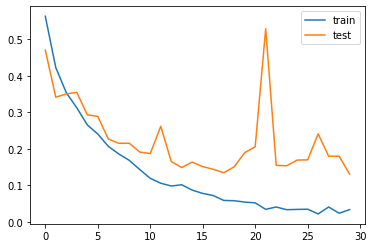

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

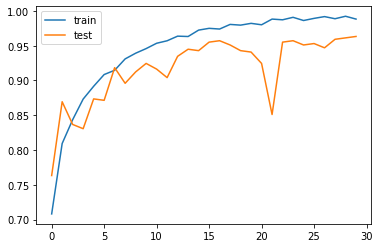

In [33]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## Load best model from checkpoint

In [48]:
val_generator = val_datagen.flow_from_directory(balanced_val_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 14,# steps = 35
                                                   class_mode = 'binary',
                                                   shuffle = False)
model.load_weights('best_model_3.h5')
pred_best_model = model.predict(val_generator,
              steps = 35)
pred_one_hot_best_model = np.round(pred_best_model)
val_true = val_generator.classes
pred_one_hot_best_model = np.round(pred_best_model)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score , precision_score
print(f' accuracy_score: {accuracy_score(val_true, pred_one_hot_best_model)}')
print(f' F1_score: {f1_score(val_true, pred_one_hot_best_model)}')
print(f' recall_score: {recall_score(val_true, pred_one_hot_best_model)}')
print(f' precision_score: {precision_score(val_true, pred_one_hot_best_model)}')

Found 490 images belonging to 2 classes.
 accuracy_score: 0.963265306122449
 F1_score: 0.9626556016597511
 recall_score: 0.9469387755102041
 precision_score: 0.9789029535864979


In [35]:
model.evaluate(val_generator,
              steps = 35)

35/35 [==============================] - 5s 136ms/step - loss: 0.1304 - acc: 0.9633 - precision: 0.9789 - recall: 0.9469


[0.13040035963058472,
 0.9632652997970581,
 0.9789029359817505,
 0.9469387531280518]

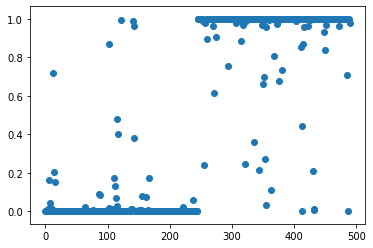

In [49]:
plt.scatter(np.arange(490),pred_best_model )

## Data augmentation

In [50]:
datagen = ImageDataGenerator(
        
        zoom_range= 0.3,
        horizontal_flip = True
)

In [51]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(balanced_train_real_dir, fname) for fname in os.listdir(balanced_train_real_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

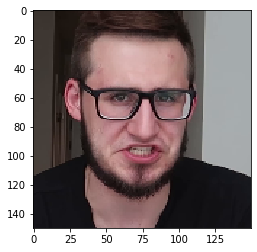

In [52]:
plt.imshow(img)

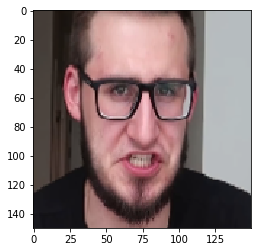

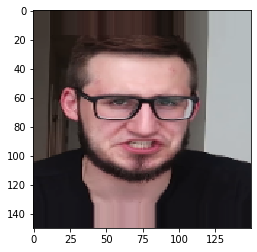

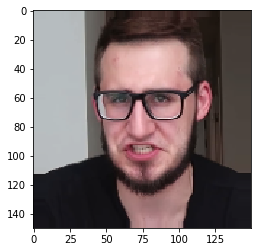

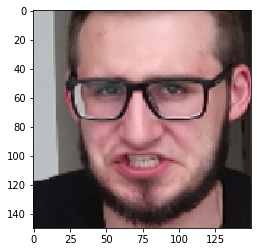

In [53]:
i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [55]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        zoom_range= 0.3,
        width_shift_range=0.08,
        height_shift_range=0.08,
        horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
        balanced_train_dir,
        target_size=(150, 150),
        batch_size = 12,
        class_mode='binary',
        shuffle = True)

validation_generator = test_datagen.flow_from_directory(
        balanced_val_dir,
        target_size=(150,150),
        batch_size = 14,
        class_mode='binary',
        shuffle = False)

Found 1956 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
model_checkpoint_loss_aug = ModelCheckpoint('best_model_3_aug.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=True)


In [58]:
history = model.fit(
        train_generator,
        steps_per_epoch = 163,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 35,
        callbacks=[model_checkpoint_loss_aug])

Epoch 1/30
163/163 [==============================] - ETA: 0s - loss: 0.5024 - acc: 0.8211 - precision: 0.8264 - recall: 0.8129
Epoch 00001: val_loss improved from inf to 0.44201, saving model to best_model_3_aug.h5
163/163 [==============================] - 35s 216ms/step - loss: 0.5024 - acc: 0.8211 - precision: 0.8264 - recall: 0.8129 - val_loss: 0.4420 - val_acc: 0.7755 - val_precision: 0.9927 - val_recall: 0.5551
Epoch 2/30
163/163 [==============================] - ETA: 0s - loss: 0.3692 - acc: 0.8436 - precision: 0.8507 - recall: 0.8333
Epoch 00002: val_loss improved from 0.44201 to 0.27046, saving model to best_model_3_aug.h5
163/163 [==============================] - 33s 201ms/step - loss: 0.3692 - acc: 0.8436 - precision: 0.8507 - recall: 0.8333 - val_loss: 0.2705 - val_acc: 0.8918 - val_precision: 0.9898 - val_recall: 0.7918
Epoch 3/30
163/163 [==============================] - ETA: 0s - loss: 0.3284 - acc: 0.8635 - precision: 0.8723 - recall: 0.8517
Epoch 00003: val_loss im

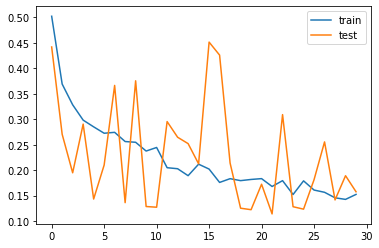

In [59]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

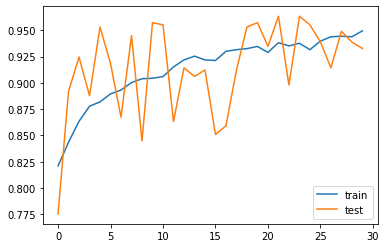

In [60]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## Check results after augmentation

In [62]:
validation_generator = val_datagen.flow_from_directory(balanced_val_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 14,# steps = 35
                                                   class_mode = 'binary',
                                                   shuffle = False)

model.load_weights('best_model_3_aug.h5')
pred_aug_model = model.predict(validation_generator,
              steps = 35)
pred_one_hot_aug_model = np.round(pred_aug_model)
val_true = validation_generator.classes
print(f' accuracy_score: {accuracy_score(val_true, pred_one_hot_aug_model)}')
print(f' F1_score: {f1_score(val_true, pred_one_hot_aug_model)}')
print(f' recall_score: {recall_score(val_true, pred_one_hot_aug_model)}')
print(f' precision_score: {precision_score(val_true, pred_one_hot_aug_model)}')

Found 490 images belonging to 2 classes.
 accuracy_score: 0.963265306122449
 F1_score: 0.9631147540983606
 recall_score: 0.9591836734693877
 precision_score: 0.9670781893004116


#### Model didn't get much better at all

## Predict test set 

In [76]:
test_dir = current_dir + '/Test/test'
num_of_test_samples = len(os.listdir(test_dir))
print(f'Number of samples in test : {num_of_test_samples}')

Number of samples in test : 4


In [77]:
test_dir_dataset = current_dir + '/Test'

In [78]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 50,# steps = 200
                                                   class_mode = 'binary',
                                                   shuffle = False)

Found 10000 images belonging to 2 classes.


In [79]:
test_preds = model.predict(test_generator,
                          steps = 200)
test_true = test_generator.classes
target_names = test_generator.filenames

In [ ]:
# Change test_preds

In [214]:
predict_answer = []
for image_name, answer in zip(target_names, test_preds):
    predict_answer.append(image_name[5:] + ' ' + str(1 - answer[0]))


In [92]:
k = 0

[0.5430619]
spoof


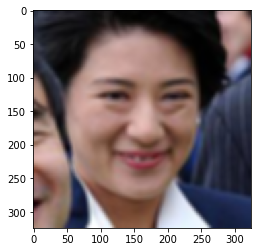

In [213]:
fnames = target_names
plt.figure(k)
img_path = test_dir + '/' + fnames[k]
img = image.load_img(img_path)
x =plt.imshow(img)
print(test_preds[k])
if test_preds[k] < 0.5:
    print('real')
else:
    print('spoof')
plt.show()

k += 1

In [170]:
#запись в файл списка строк с помощью функции writelines
file_obj = open('image_prediction_bogan.txt', 'w')
file_obj.writelines(digit + '\n' for digit in map(str, predict_answer))
file_obj.close()

In [171]:
for i in range(10):
    print(predict_answer[i])

0004TGCC.png 1.0
00BMIGHK.png 0.9806457
00DH97CQ.png 0.013816296
00GZOF2Z.png 0.16079132
00I3IO2B.png 1.0
00J6CTJ6.png 0.0004378489
00S0VB8K.png 0.96435726
00Y667ZT.png 0.9993832
01HMQTOX.png 0.9615062
01RRI4YP.png 0.0047265585
